# <font color=darkpink>Airbnb Berlin</font>

This script contains the following:

1. Import libraries and data


2. Data cleaning


3. Data prep for regression analysis


4. Regression analysis


5. Export data

** **

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/berk/Airbnb_Berlin'

In [4]:
# Import data

df_list = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'list_cleaned_3.csv'), index_col = False)

## 2. Data cleaning

In [5]:
df_list.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'district', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_total_listings', 'availability_365',
       'review_in_the_last_year', 'license', 'price_category'],
      dtype='object')

In [6]:
# Drop Unnamed

df_list = df_list.drop(columns = ['Unnamed: 0'])

In [7]:
df_list.head()

,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...,middle_price
1,251423,2-room I 50 m² I Comfort I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53867,13.39712,Entire home/apt,100,3,14,2023-01-29,0.11,8,93,10,01/Z/NA/003420-15,middle_price
2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18,high_price
3,251486,I 2 Room I 41 m² I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Süd,52.53667,13.39505,Entire home/apt,108,3,31,2023-03-14,0.24,8,104,28,01/Z/ZA/006181-16,middle_price
4,251493,2-room I 41 m² I Terrace > Mitte,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53881,13.39654,Entire home/apt,98,3,15,2023-02-26,0.12,8,98,13,01/Z/ZA/006180-16,middle_price


In [8]:
df_list.shape

(6063, 19)

In [9]:
# Check for missing values

df_list.isnull().sum()  # No Missing Values

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
district                   0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review                0
reviews_per_month          0
host_total_listings        0
availability_365           0
review_in_the_last_year    0
license                    0
price_category             0
dtype: int64

In [10]:
# Check dups

dups = df_list.duplicated()

dups.shape # No Dups

(6063,)

/Users/berk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

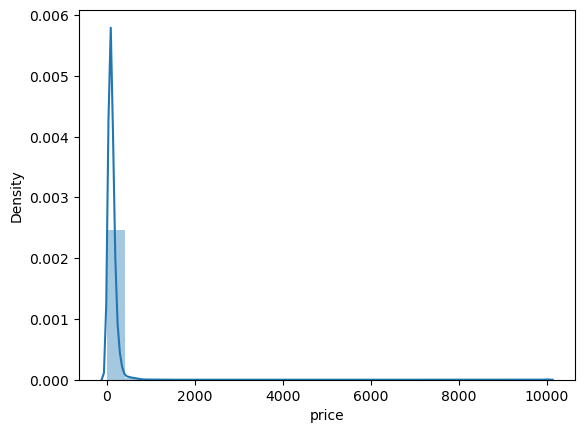

In [11]:
# Extreme values checks

sns.distplot(df_list['price'], bins=25)  # Shows extreme values

In [12]:
df_list.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year
count,6.063000e+03,6.063000e+03,6063.000000,6063.000000,6063.000000,6063.000000,6063.000000,6063.000000,6063.000000,6063.000000,6063.000000
mean,1.625966e+17,1.398033e+08,52.509543,13.403981,123.571499,6.950025,60.797955,1.552847,6.057727,139.830117,17.876959
std,2.941569e+17,1.548899e+08,0.034758,0.069322,242.069727,20.048670,96.805576,2.198808,12.290433,124.775739,28.061429
min,3.176000e+03,3.718000e+03,52.369040,13.118150,13.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.957311e+07,9.573130e+06,52.491160,13.367395,65.000000,1.000000,7.000000,0.385000,1.000000,15.000000,2.000000
50%,3.816220e+07,6.419923e+07,52.510360,13.411150,95.000000,2.000000,23.000000,0.990000,1.000000,111.000000,9.000000
75%,5.392861e+07,2.412783e+08,52.532168,13.437400,144.000000,4.000000,73.000000,2.060000,5.000000,256.000000,25.000000
max,8.435044e+17,5.036882e+08,52.656110,13.721360,9999.000000,720.000000,1806.000000,70.730000,133.000000,365.000000,703.000000


## 3. Data prep for regression analysis

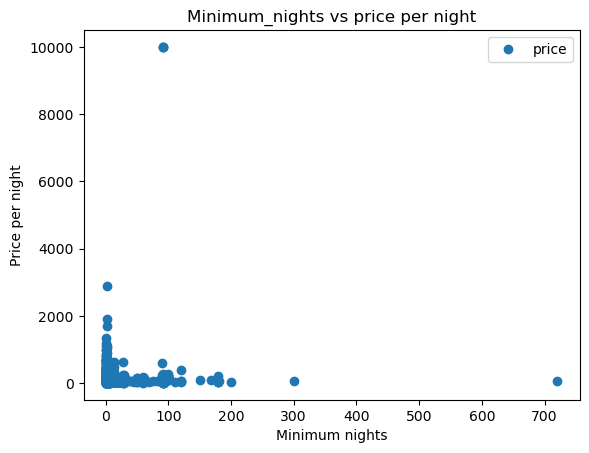

In [13]:
# Create a scatterplot minimum_nights vs price

df_list.plot(x = 'minimum_nights', y = 'price', style = 'o')
plt.title('Minimum_nights vs price per night')  
plt.xlabel('Minimum nights')  
plt.ylabel('Price per night')  
plt.show()

While not following a strictly linear pattern, there is an observable trend in the data. The majority of data points tend to cluster towards the lower end of the minimum nights range. As the minimum nights increase, there is a corresponding decrease in price.

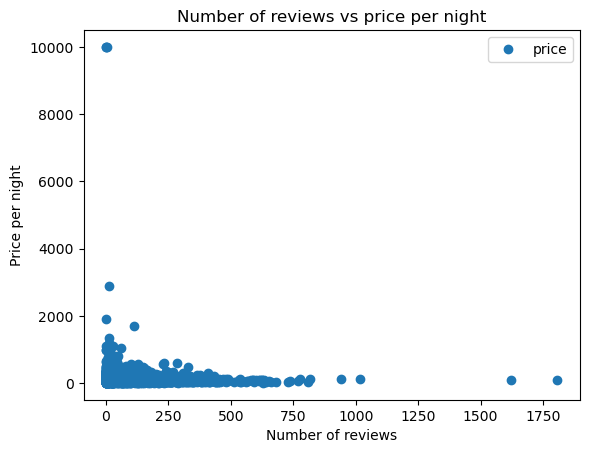

In [14]:
# Create a scatterplot number_of_reviews vs price

df_list.plot(x = 'number_of_reviews', y = 'price', style = 'o')
plt.title('Number of reviews vs price per night')  
plt.xlabel('Number of reviews')  
plt.ylabel('Price per night')  
plt.show()

This relationship does not exhibit a linear pattern, either.

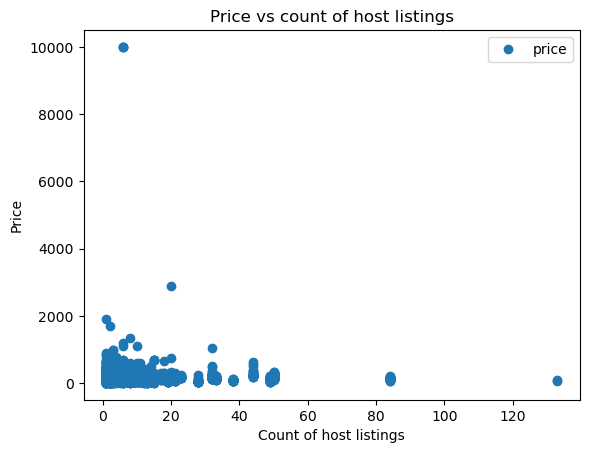

In [15]:
# Create a scatterplot price vs host_total_listings

df_list.plot(x = 'host_total_listings', y = 'price', style = 'o')
plt.title('Price vs count of host listings')  
plt.xlabel('Count of host listings')  
plt.ylabel('Price')  
plt.show()

This relationship could be linear.

Hypothesis: It is hypothesized that the host listings for an Airbnb listing in Berlin has a positive impact on its pricing.

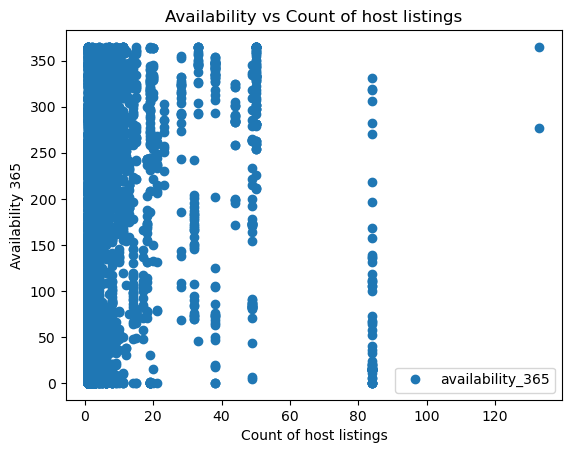

In [16]:
# Create a scatterplot availability vs host_total_listings

df_list.plot(x = 'host_total_listings', y = 'availability_365', style = 'o')
plt.title('Availability vs Count of host listings')  
plt.xlabel('Count of host listings')  
plt.ylabel('Availability 365')  
plt.show()

#### I have selected the scatter plot showcasing the correlation between Price and Count of host listings for regression analysis. This scatter plot demonstrates a clear linear trend, suggesting a possible relationship between these two variables. Thus, I will proceed with conducting regression analysis by considering Price as the dependent variable and Count of host listings as the independent variable.

In [17]:
# Reshape the variables, put them into separate objects.

X = df_list['host_total_listings'].values.reshape(-1,1)

y = df_list['price'].values.reshape(-1,1)

In [18]:
X

array([[1],
       [8],
       [1],
       ...,
       [1],
       [2],
       [1]])

In [19]:
y

array([[ 83],
       [100],
       [180],
       ...,
       [ 49],
       [ 62],
       [ 60]])

In [20]:
# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [21]:
# Create regression object

regression = LinearRegression()

In [22]:
# Fit it onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Use trained regression object to predict y using X in test set 

y_predicted = regression.predict(X_test)

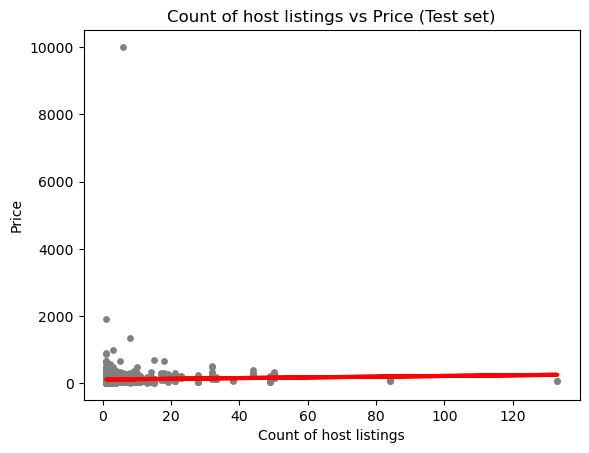

In [24]:
# Create plot showing regression line (results) from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color= 'red', linewidth = 3)
plot_test.title('Count of host listings vs Price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()

In [25]:
# Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
# Check model summary statistics to evaluate performance of model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04898141]]
Mean squared error:  64038.0646595167
R2 score:  0.0013651100247573655


The positive slope coefficient suggests that there is a general tendency for the price (y) to increase as the count of host listings (X) increases.

However, the high Mean Squared Error (MSE) indicates that the linear regression line does not accurately represent the relationship between the variables. The model's predictions deviate significantly from the actual data points, suggesting a lack of precision.

Additionally, the low R2 score suggests that the linear model does not capture the variation in the data well. The strength of the linear relationship between the variables is relatively weak, indicating that a non-linear model might provide a better fit for analyzing this relationship.

In [27]:
# Create a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,139,123.102825
1,225,125.200788
2,50,117.857918
3,45,117.857918
4,120,117.857918
5,57,117.857918
6,120,117.857918
7,175,169.258007
8,125,117.857918
9,88,117.857918


After careful evaluation, it is clear that the model's predictive capabilities for y are not optimal. As a result, an additional version is now presented for your consideration.

In [28]:
# Compare how regression fits training set. How well does model predict y in the training set?

y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04898141]]
Mean squared error:  56046.17274690752
R2 score:  0.0029944933270902307


MSE remains large while R2 score is very low.

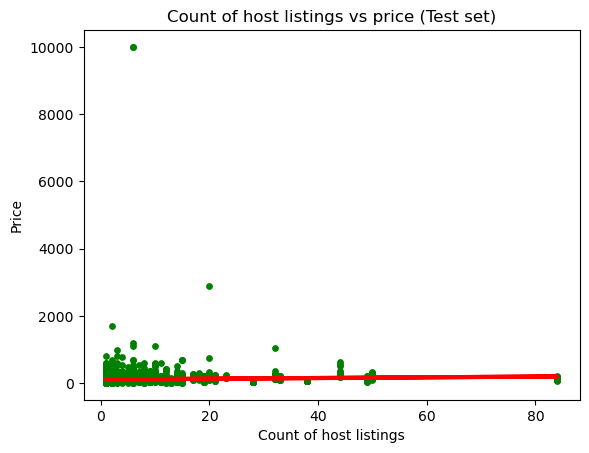

In [31]:
# Visualize it

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('Count of host listings vs price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()

## 5. Export data

In [32]:
# Export df_list

df_list.to_csv(os.path.join(path, 'Data','Prepared_Data', 'list_cleaned_4.csv'))